In [1]:
%pwd
%cd ../..

/Users/ryandevera/data-science/umn_environments/Deeplifting


In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [3]:
problem_name = 'ackley'
problem = PROBLEMS_BY_NAME[problem_name]

In [4]:
outputs = run_deeplifting(problem, trials=10)



╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem specifications:  

/Users/ryandevera/.virtualenvs/deeplifing/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3575.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


   2 ║  - │   -   ║  0.33706376552 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 7.55e-04   ║ 
   3 ║  - │   -   ║  0.10828885464 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 4.17e-04   ║ 
   4 ║  - │   -   ║  0.09943679209 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 3.94e-04   ║ 
   5 ║  - │   -   ║  0.08268518132 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 2.97e-04   ║ 
   6 ║  - │   -   ║  0.03489844796 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 1.72e-04   ║ 
   7 ║  - │   -   ║  0.02429342534 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 9.14e-05   ║ 
   8 ║  - │   -   ║  0.01475289043 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 9.02e-05   ║ 
   9 ║  - │   -   ║  0.00687549220 ║   -  │   -  ║ QN │     2 │ 0.500000 ║     1 │ 5.69e-05   ║ 
  10 ║  - │   -   ║  0.00349819633 ║   -  │   -  ║ QN │     3 │ 0.250000 ║     1 │ 2.62e-05   ║ 
  11 ║  - │   -   ║  0.00252575893 ║   -  │   -  ║ QN │     2 │ 0.500000 ║     1 │ 2.11e-05   ║ 
  12 ║  - │   -   ║  0.0016620

In [5]:
results = outputs['final_results']

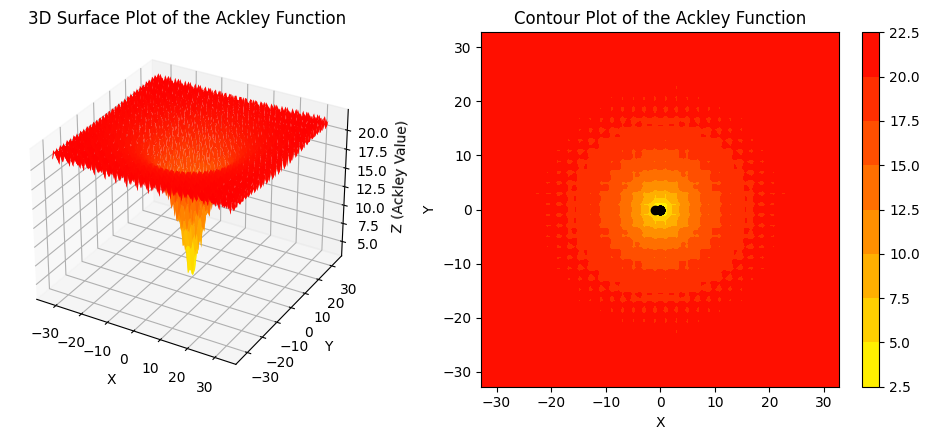

In [6]:
fig = create_optimization_plot(problem, results, colormap='autumn_r')

In [7]:
fig.savefig(
    '/Users/ryandevera/data-science/umn_environments/Deeplifting'
    f'/images/{problem_name}_surface_and_contour.png'
)